In [ ]:
#  You must include a written description of three observable trends based on the data.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
# Read the City and Ride Data
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(ride_data_to_load, city_data_to_load, on="city")

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [30]:
# Display the data table for preview
combined_data.reset_index
# combined_data.groupby(['city'])
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [49]:
urban = combined_data[combined_data['type']=='Urban']
rural = combined_data[combined_data['type']=='Rural']
suburban = combined_data[combined_data['type']=='Suburban']

In [50]:
# Obtain the x and y coordinates for each of the three city types
x_axis_r = rural['city'].value_counts(sort='city')
y_axis_r = rural.groupby(['city'])['fare'].mean()
driver_ct_r = rural.groupby(['city'])['driver_count'].mean()

x_axis_u = urban['city'].value_counts(sort='city')
y_axis_u = urban.groupby(['city'])['fare'].mean()
driver_ct_u = urban.groupby(['city'])['driver_count'].mean()

x_axis_s = suburban['city'].value_counts(sort='city')
y_axis_s = suburban.groupby(['city'])['fare'].mean()
driver_ct_s = suburban.groupby(['city'])['driver_count'].mean()

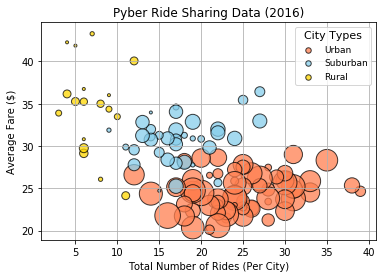

In [82]:
# Build the scatter plots for each city types
plt.scatter(x_axis_u, y_axis_u, marker="o",facecolors="lightcoral", 
            edgecolors="black", s=driver_ct_u*9, label="Urban", alpha=0.75)
plt.scatter(x_axis_s, y_axis_s, marker="o", facecolors="lightskyblue", 
            edgecolors="black", s=driver_ct_s*9, label="Suburban", alpha=0.75)
plt.scatter(x_axis_r, y_axis_r, marker="o", facecolors="gold", 
            edgecolors="black", s=driver_ct*9, label="Rural", alpha=0.75)
# Incorporate the other graph properties
plt.grid()
# Create a legend
lgnd = plt.legend(loc='best', fontsize=9, title='City Types', title_fontsize=11)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Save Figure
plt.savefig("PyRideShareData.png")

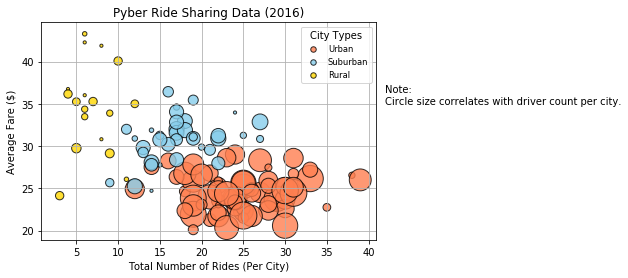

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [89]:
total_suburb = suburban['fare'].sum()
pct_suburb = total_suburb/total_fares
pct_suburb

0.3046387206273222

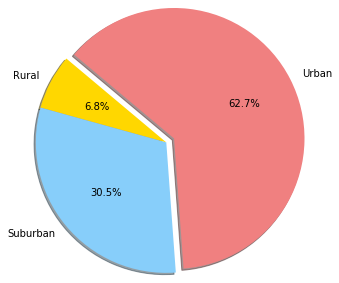

In [138]:
# Calculate Type Percents
total_fares = combined_data['fare'].sum()

# Rural        4327.93
total_rural = rural['fare'].sum()
pct_rural = total_rural/total_fares

# Urban       39854.38
total_urban = urban['fare'].sum()
pct_urban = total_urban/total_fares

# Suburban    19356.33
total_suburb = suburban['fare'].sum()
pct_suburb = total_suburb/total_fares

# Build Pie Chart
pcts = [pct_rural, pct_suburb, pct_urban]

explode = (0, 0, 0.1)

labels = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

# plt.title("% of Total Fares by City Type")
plt.pie(pcts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=1.5)

# Save Figure
plt.savefig("PctFareCity.png")
# Show Figure
plt.show()

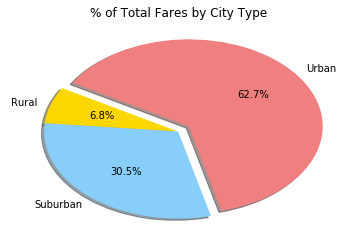

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [124]:
rides_rural = rural['type'].count()
per_rural = rides_rural/total_rides
per_rural



0.05263157894736842

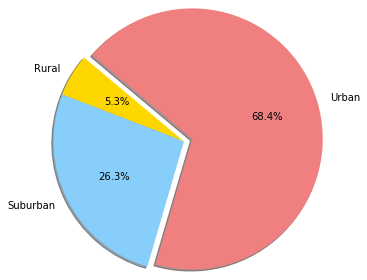

In [127]:
# Calculate Ride Percents
total_rides = combined_data['type'].count()

# Rural        125
rides_rural = rural['type'].count()
per_rural = rides_rural/total_rides

# Urban       1625
rides_urban = urban['type'].count()
per_urban = rides_urban/total_rides

# Suburban     625
rides_suburb = suburban['type'].count()
per_suburb = rides_suburb/total_rides

# Build Pie Chart
pcts = [per_rural, per_suburb, per_urban]

explode = (0, 0, 0.1)

labels = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

plt.title("% of Total Rides by City Type")
plt.pie(pcts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=1.5)

# Save Figure
plt.savefig("TotalRidesCity.png")
# Show Figure
plt.show()

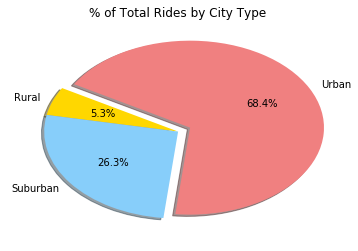

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [133]:
drive_rural = rural['driver_count'].sum()
ptg_rural = drive_rural/total_drive
ptg_rural

68709

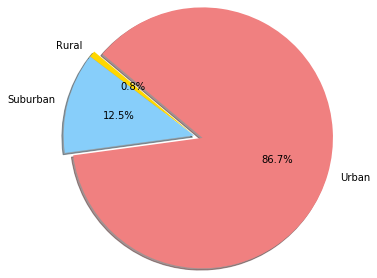

In [136]:
# Calculate Driver Percents
total_drive = combined_data['driver_count'].sum()
# Total = 68709

# Rural        537
drive_rural = rural['driver_count'].sum()
ptg_rural = drive_rural/total_drive

# Urban       59602
drive_urban = urban['driver_count'].sum()
ptg_urban = drive_urban/total_drive

# Suburban    8570
drive_suburb = suburban['driver_count'].sum()
ptg_suburb = drive_suburb/total_drive

# Build Pie Charts
pcts = [ptg_rural, ptg_suburb, ptg_urban]

explode = (0, 0, 0.1)

labels = ["Rural", "Suburban", "Urban"]

colors = ["gold", "lightskyblue", "lightcoral"]

# plt.title("% of Total Drivers by City Type")
plt.pie(pcts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius=1.5)

# Save Figure
plt.savefig("TotalDriversCity.png")
# Show Figure
plt.show()

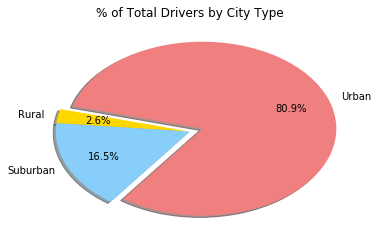

In [6]:
# Show Figure
plt.show()